### 수면의 질에 관한 상관관계
- 데이터 : Sleep_health_and_lifestyle_dataset.csv
- 타겟 몇 개를 제외하고 전체를 피쳐를 잡거나 2개~3개로 피쳐로 잡아서 관계 알아보기
- 피쳐 : sleep Duration, Quality of Sleep
- 타겟 : sleep Disorder
- 기계학습 : 1. 지도학습 + 분류(KNN Classifier)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = './data/Sleep_health_and_lifestyle_dataset.csv'

In [3]:
sleepDF = pd.read_csv(data)
sleepDF

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
# 데이터 확인
sleepDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
# 중복데이터
sleepDF.duplicated().sum()

0

In [6]:
# 결측치 체크
sleepDF.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [7]:
# 결측치 None으로 대체
sleepDF = sleepDF.fillna('None')

In [8]:
sleepDF

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [9]:
# 'None', Sleep Apnea', 'Insomnia' 세 가지 데이터 추출 
mask = sleepDF['Sleep Disorder'].isin(['None', 'Sleep Apnea', 'Insomnia'])

# 해당 행만 도출
twosleepDF = sleepDF[mask]

# 인덱스 정리
twosleepDF = twosleepDF.reset_index(drop=True)

In [10]:
# Sleep Duration 컬럼
ret1 = twosleepDF['Sleep Duration'] - twosleepDF['Sleep Duration'].mean()
ret1 = ret1/twosleepDF['Sleep Duration'].std()

In [11]:
# Length 컬럼
ret2 = twosleepDF['Quality of Sleep'] - twosleepDF['Quality of Sleep'].mean()
ret2 = ret2/twosleepDF['Quality of Sleep'].std()

In [12]:
# 피쳐 데이터 추출
feature = twosleepDF[twosleepDF.columns[4:6]]
feature.head()

,Sleep Duration,Quality of Sleep
0,6.1,6
1,6.2,6
2,6.2,6
3,5.9,4
4,5.9,4


In [13]:
# 타겟 데이터 추출
target = twosleepDF['Sleep Disorder']

target=target.replace({'None':0, 'Sleep Apnea':1, 'Insomnia':2}).copy()

# 데이터 확인
print(target.head(3), target.tail(3), sep='\n\n')

0    0
1    0
2    0
Name: Sleep Disorder, dtype: int64

371    1
372    1
373    1
Name: Sleep Disorder, dtype: int64


In [14]:
# 모듈 로딩
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, stratify=target, random_state=42)

In [16]:
# 학습 및 테스트 데이터셋 확인
print(f'학습용 데이터셋 ---->\n{X_train.shape}, {y_train}')
print(f'{y_train.value_counts()/y_train.shape[0]}')

print(f'테스트용 데이터셋 ---->\n{X_test.shape}, {y_test}')
print(f'{X_test.value_counts()/y_test.shape[0]}')

학습용 데이터셋 ---->
(299, 2), 270    1
200    2
142    0
329    0
355    1
      ..
48     0
264    2
77     0
209    0
126    0
Name: Sleep Disorder, Length: 299, dtype: int64
Sleep Disorder
0    0.585284
1    0.207358
2    0.207358
Name: count, dtype: float64
테스트용 데이터셋 ---->
(75, 2), 68     0
58     0
196    2
191    2
60     0
      ..
21     0
174    0
362    1
104    1
368    1
Name: Sleep Disorder, Length: 75, dtype: int64
Sleep Duration  Quality of Sleep
7.2             8                   0.160000
6.0             6                   0.093333
6.2             6                   0.066667
8.0             9                   0.066667
7.8             8                   0.066667
6.4             6                   0.053333
8.4             9                   0.040000
6.5             7                   0.040000
6.6             7                   0.040000
8.2             9                   0.040000
7.5             8                   0.026667
8.3             9                   0.026667

In [17]:
# 모듈 로딩
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X_train)

StandardScaler()

In [20]:
scaler.mean_

array([7.12274247, 7.28093645])

In [21]:
# 학습용 데이터 피쳐 스케일링
scaled_X_train = scaler.transform(X_train)
scaled_X_train.shape

(299, 2)

In [22]:
# 테스트용 데이터 피쳐 스케일링
scaled_X_test = scaler.transform(X_test)
scaled_X_test.shape

(75, 2)

In [23]:
# 모듈 로딩
import matplotlib.pyplot as plt

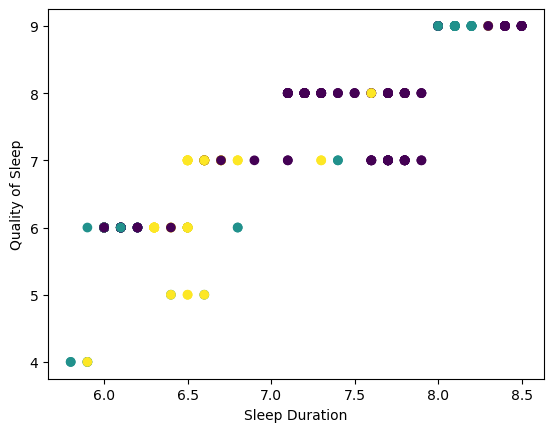

In [24]:
## => 원본 데이터 시각화
plt.scatter(X_train['Sleep Duration'], X_train['Quality of Sleep'], c=y_train)
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.show()

In [25]:
# 모듈 로딩
from sklearn.neighbors import KNeighborsClassifier

In [26]:
#(4-1) KNN 알고리즘
sleepmodel = KNeighborsClassifier()
sleepmodel.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [27]:
# 방법 (2) : SVC
from sklearn.svm import SVC

sleepmodel2=SVC()

sleepmodel2.fit(scaled_X_train, y_train)

SVC()

In [28]:
# 방법 (3) : LogisticRegression
from sklearn.linear_model import LogisticRegression

sleepmodel3 = LogisticRegression()

sleepmodel3.fit(scaled_X_train, y_train)

LogisticRegression()

In [29]:
import joblib
import os

def save_model(model, model_name):
    # 모델 저장하는 함수
    model_dir = 'model/'
    model_filename = model_dir + f'{model_name}.pkl'
    
    # 저장 폴더 존재여부 확인 후 저장
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    joblib.dump(model, model_filename)

In [30]:
save_model(sleepmodel, sleepmodel)

In [31]:
save_model(sleepmodel2, sleepmodel2)

In [32]:
print('KNN train', sleepmodel.score(scaled_X_train, y_train))
print('SVC train', sleepmodel2.score(scaled_X_train, y_train))
print('LogisticRegression train', sleepmodel3.score(scaled_X_train, y_train))
print('')
print('KNN test', sleepmodel.score(scaled_X_test, y_test))
print('SVC test', sleepmodel2.score(scaled_X_test, y_test))
print('LogisticRegression test', sleepmodel3.score(scaled_X_test, y_test))

KNN train 0.8294314381270903
SVC train 0.8093645484949833
LogisticRegression train 0.5117056856187291

KNN test 0.7466666666666667
SVC test 0.8
LogisticRegression test 0.4666666666666667


In [33]:
## 수면시간 8.0, 수면질, 9인 수면 질병 예측
new_data = pd.DataFrame([[8.0, 9]], columns=twosleepDF.columns[4:6])

In [34]:
# 피쳐스케일링 진행
scaled_new_data = scaler.transform(new_data)

In [35]:
# 예측
sleepmodel.predict(scaled_new_data)

array([1], dtype=int64)

In [36]:
sleepmodel2.predict(scaled_new_data)

array([1], dtype=int64)

In [37]:
sleepmodel3.predict(scaled_new_data)

array([0], dtype=int64)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(scaled_X_train,y_train)
rf_model.score(scaled_X_test,y_test)

0.8266666666666667

In [39]:
rf_model.score(scaled_X_train,y_train)

0.8494983277591973

In [40]:
rf_model.predict(scaled_new_data)

array([1], dtype=int64)

In [41]:
save_model(rf_model, rf_model)